# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


### 2. Visualize the First 24 Training Images

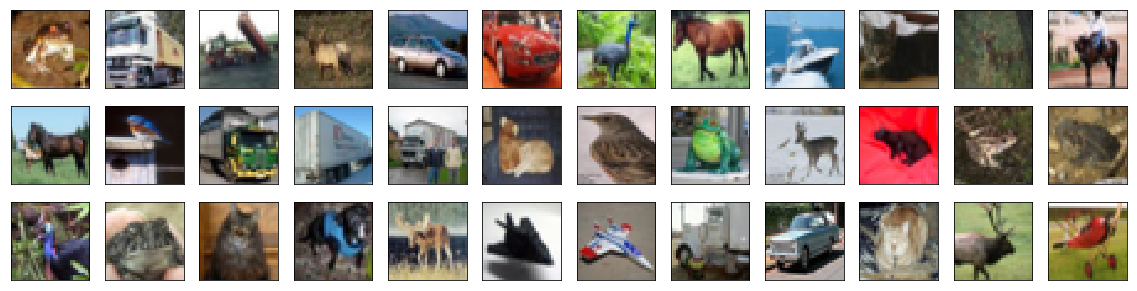

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [4]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture - BASE

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

### 5. Define the Model Architecture - Iteration_1
Respect to the **Baseline model** we have increased the number of filters at each step by *2*.

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, PReLU

model_2 = Sequential()
model_2.add(Conv2D(filters=32, kernel_size=2, padding='same', input_shape=(32, 32, 3)))
model_2.add(PReLU())
model_2.add(MaxPooling2D(pool_size=2))
model_2.add(Conv2D(filters=64, kernel_size=2, padding='same'))
model_2.add(PReLU())
model_2.add(MaxPooling2D(pool_size=2))
model_2.add(Conv2D(filters=128, kernel_size=2, padding='same'))
model_2.add(PReLU())
model_2.add(MaxPooling2D(pool_size=2))
model_2.add(Dropout(0.3))
model_2.add(Flatten())
model_2.add(Dense(500))
model_2.add(PReLU())
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='softmax'))

model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
p_re_lu_8 (PReLU)            (None, 32, 32, 32)        32768     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        8256      
_________________________________________________________________
p_re_lu_9 (PReLU)            (None, 16, 16, 64)        16384     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 128)         32896     
__________

### 5. Define the Model Architecture - Iteration_2
Respect to the **Baseline model** we have increased the number of filters at each step by *2* and the number 
of *fully connected* neurons; expansion of the **iteration_2**.

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, PReLU

model_3 = Sequential()
model_3.add(Conv2D(filters=32, kernel_size=2,activation = 'relu', 
                   padding='same', input_shape=(32, 32, 3)))
model_3.add(MaxPooling2D(pool_size=2))
model_3.add(Conv2D(filters=64, kernel_size=2, activation = 'relu',
                   padding='same'))
model_3.add(MaxPooling2D(pool_size=2))
model_3.add(Conv2D(filters=128, kernel_size=2, activation = 'relu',
                   padding='valid'))
model_3.add(MaxPooling2D(pool_size=2))
model_3.add(Flatten())
model_3.add(Dense(500))
model_3.add(PReLU())
model_3.add(Dropout(0.6))
model_3.add(Dense(250))
model_3.add(PReLU())
model_3.add(Dense(50))
model_3.add(PReLU())
model_3.add(Dense(10, activation='softmax'))

model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)         32896     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0         
__________

### 5. Define the Model Architecture - Iteration_3
Respect to the **Iteration_2** we have decreased the number of filters at each step by *2*; i.e. restaured the original filters size.

In [49]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, PReLU

model_4 = Sequential()
model_4.add(Conv2D(filters=32, kernel_size=2,activation = 'relu', 
                   padding='same', input_shape=(32, 32, 3)))
model_4.add(MaxPooling2D(pool_size=2))
model_4.add(Conv2D(filters=64, kernel_size=2, activation = 'relu',
                   padding='valid'))
model_4.add(MaxPooling2D(pool_size=2))
model_4.add(Flatten())
model_4.add(Dropout(0.4))
model_4.add(Dense(256))
model_4.add(PReLU())
model_4.add(Dropout(0.4))
model_4.add(Dense(128))
model_4.add(PReLU())
model_4.add(Dropout(0.4))
model_4.add(Dense(64))
model_4.add(PReLU())
model_4.add(Dense(10, activation='softmax'))

model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 64)        8256      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 3136)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 256)               803072    
__________

### 6. Compile the Model 

In [6]:
# compile the model: "Base"
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [14]:
# compile the model: "Iteration_1"
model_2.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [22]:
# compile the model: "Iteration_2"
model_3.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [50]:
# compile the model: "Iteration_3"
model_4.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [7]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
Epoch 00000: val_loss improved from inf to 1.35820, saving model to model.weights.best.hdf5
46s - loss: 1.6192 - acc: 0.4140 - val_loss: 1.3582 - val_acc: 0.5166
Epoch 2/100
Epoch 00001: val_loss improved from 1.35820 to 1.22245, saving model to model.weights.best.hdf5
53s - loss: 1.2881 - acc: 0.5402 - val_loss: 1.2224 - val_acc: 0.5644
Epoch 3/100
Epoch 00002: val_loss improved from 1.22245 to 1.12096, saving model to model.weights.best.hdf5
49s - loss: 1.1630 - acc: 0.5879 - val_loss: 1.1210 - val_acc: 0.6046
Epoch 4/100
Epoch 00003: val_loss improved from 1.12096 to 1.10724, saving model to model.weights.best.hdf5
56s - loss: 1.0928 - acc: 0.6160 - val_loss: 1.1072 - val_acc: 0.6134
Epoch 5/100
Epoch 00004: val_loss improved from 1.10724 to 0.97377, saving model to model.weights.best.hdf5
52s - loss: 1.0413 - acc: 0.6382 - val_loss: 0.9738 - val_acc: 0.6596
Epoch 6/100
Epoch 00005: val_loss improved from 0.97377 to 0.9550

In [15]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model_2.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 21s - loss: 1.5059 - acc: 0.4540 - val_loss: 1.2442 - val_acc: 0.5560

Epoch 00001: val_loss improved from inf to 1.24420, saving model to model.weights.best.hdf5
Epoch 2/100
 - 16s - loss: 1.1480 - acc: 0.5944 - val_loss: 1.0532 - val_acc: 0.6350

Epoch 00002: val_loss improved from 1.24420 to 1.05322, saving model to model.weights.best.hdf5
Epoch 3/100
 - 16s - loss: 1.0204 - acc: 0.6453 - val_loss: 1.0089 - val_acc: 0.6528

Epoch 00003: val_loss improved from 1.05322 to 1.00890, saving model to model.weights.best.hdf5
Epoch 4/100
 - 16s - loss: 0.9473 - acc: 0.6742 - val_loss: 1.0571 - val_acc: 0.6304

Epoch 00004: val_loss did not improve from 1.00890
Epoch 5/100
 - 16s - loss: 0.8973 - acc: 0.6944 - val_loss: 1.0006 - val_acc: 0.6922

Epoch 00005: val_loss improved from 1.00890 to 1.00061, saving model to model.weights.best.hdf5
Epoch 6/100
 - 16s - loss: 0.8597 - acc: 0.7091 - val_loss: 0.9845 - val_acc: 0.6738

Epoc

 - 16s - loss: 0.8158 - acc: 0.7467 - val_loss: 0.9585 - val_acc: 0.6860

Epoch 00058: val_loss did not improve from 0.77005
Epoch 59/100
 - 16s - loss: 0.8109 - acc: 0.7492 - val_loss: 1.1482 - val_acc: 0.6988

Epoch 00059: val_loss did not improve from 0.77005
Epoch 60/100
 - 16s - loss: 0.8134 - acc: 0.7463 - val_loss: 1.0899 - val_acc: 0.7084

Epoch 00060: val_loss did not improve from 0.77005
Epoch 61/100
 - 16s - loss: 0.8150 - acc: 0.7471 - val_loss: 0.9365 - val_acc: 0.7106

Epoch 00061: val_loss did not improve from 0.77005
Epoch 62/100
 - 16s - loss: 0.8096 - acc: 0.7442 - val_loss: 0.9659 - val_acc: 0.7028

Epoch 00062: val_loss did not improve from 0.77005
Epoch 63/100
 - 16s - loss: 0.8208 - acc: 0.7445 - val_loss: 0.8651 - val_acc: 0.7374

Epoch 00063: val_loss did not improve from 0.77005
Epoch 64/100
 - 16s - loss: 0.8112 - acc: 0.7474 - val_loss: 1.0005 - val_acc: 0.6970

Epoch 00064: val_loss did not improve from 0.77005
Epoch 65/100
 - 16s - loss: 0.8107 - acc: 0.750

In [30]:
from keras.callbacks import ModelCheckpoint, EarlyStopping   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.05, patience=10, 
                             verbose=1, mode='auto')

hist = model_3.fit(x_train, y_train, batch_size=128, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer, earlystopper], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 5s - loss: 0.4911 - acc: 0.8303 - val_loss: 0.9217 - val_acc: 0.7156

Epoch 00001: val_loss improved from inf to 0.92167, saving model to model.weights.best.hdf5
Epoch 2/100
 - 5s - loss: 0.4819 - acc: 0.8340 - val_loss: 0.9195 - val_acc: 0.7268

Epoch 00002: val_loss improved from 0.92167 to 0.91953, saving model to model.weights.best.hdf5
Epoch 3/100
 - 5s - loss: 0.4648 - acc: 0.8387 - val_loss: 0.8386 - val_acc: 0.7316

Epoch 00003: val_loss improved from 0.91953 to 0.83863, saving model to model.weights.best.hdf5
Epoch 4/100
 - 5s - loss: 0.4526 - acc: 0.8428 - val_loss: 0.8193 - val_acc: 0.7446

Epoch 00004: val_loss improved from 0.83863 to 0.81932, saving model to model.weights.best.hdf5
Epoch 5/100
 - 5s - loss: 0.4411 - acc: 0.8474 - val_loss: 0.8812 - val_acc: 0.7084

Epoch 00005: val_loss did not improve from 0.81932
Epoch 6/100
 - 5s - loss: 0.4255 - acc: 0.8536 - val_loss: 0.7851 - val_acc: 0.7496

Epoch 0000

In [52]:
from keras.callbacks import ModelCheckpoint, EarlyStopping   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.05, patience=10, 
                             verbose=1, mode='auto')

hist = model_4.fit(x_train, y_train, batch_size=50, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 9s - loss: 0.6854 - acc: 0.7690 - val_loss: 0.8093 - val_acc: 0.7246

Epoch 00001: val_loss improved from inf to 0.80925, saving model to model.weights.best.hdf5
Epoch 2/100
 - 8s - loss: 0.6883 - acc: 0.7666 - val_loss: 0.7296 - val_acc: 0.7558

Epoch 00002: val_loss improved from 0.80925 to 0.72955, saving model to model.weights.best.hdf5
Epoch 3/100
 - 8s - loss: 0.6902 - acc: 0.7677 - val_loss: 0.7337 - val_acc: 0.7554

Epoch 00003: val_loss did not improve from 0.72955
Epoch 4/100
 - 8s - loss: 0.6857 - acc: 0.7696 - val_loss: 0.7426 - val_acc: 0.7532

Epoch 00004: val_loss did not improve from 0.72955
Epoch 5/100
 - 8s - loss: 0.6865 - acc: 0.7704 - val_loss: 0.7312 - val_acc: 0.7580

Epoch 00005: val_loss did not improve from 0.72955
Epoch 6/100
 - 8s - loss: 0.6868 - acc: 0.7715 - val_loss: 0.7266 - val_acc: 0.7564

Epoch 00006: val_loss improved from 0.72955 to 0.72655, saving model to model.weights.best.hdf5
Epoc


Epoch 00059: val_loss did not improve from 0.69903
Epoch 60/100
 - 8s - loss: 0.6516 - acc: 0.7893 - val_loss: 0.7432 - val_acc: 0.7634

Epoch 00060: val_loss did not improve from 0.69903
Epoch 61/100
 - 8s - loss: 0.6448 - acc: 0.7894 - val_loss: 0.7608 - val_acc: 0.7566

Epoch 00061: val_loss did not improve from 0.69903
Epoch 62/100
 - 8s - loss: 0.6496 - acc: 0.7902 - val_loss: 0.7269 - val_acc: 0.7576

Epoch 00062: val_loss did not improve from 0.69903
Epoch 63/100
 - 8s - loss: 0.6438 - acc: 0.7923 - val_loss: 0.7280 - val_acc: 0.7616

Epoch 00063: val_loss did not improve from 0.69903
Epoch 64/100
 - 8s - loss: 0.6483 - acc: 0.7893 - val_loss: 0.7947 - val_acc: 0.7564

Epoch 00064: val_loss did not improve from 0.69903
Epoch 65/100
 - 8s - loss: 0.6425 - acc: 0.7914 - val_loss: 0.7968 - val_acc: 0.7340

Epoch 00065: val_loss did not improve from 0.69903
Epoch 66/100
 - 8s - loss: 0.6418 - acc: 0.7931 - val_loss: 0.7185 - val_acc: 0.7634

Epoch 00066: val_loss did not improve fr

### 8. Load the Model with the Best Validation Accuracy

In [53]:
# load the weights that yielded the best validation accuracy
model_4.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [18]:
# evaluate and print test accuracy
score = model_2.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.734


In [32]:
# evaluate and print test accuracy
score = model_3.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7536


In [54]:
# evaluate and print test accuracy
score = model_4.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7544


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [10]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

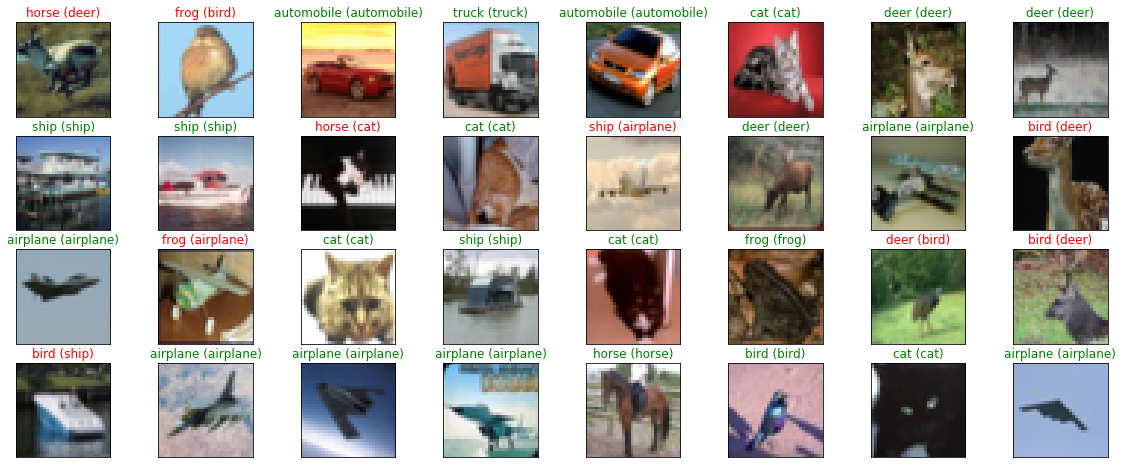

In [11]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))